In [1]:
from scipy.optimize import minimize
import sys
sys.path.append('../gefera')
import gefera as gf

import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('k51.txt')
t = np.ascontiguousarray(data[:, 0])
y = np.ascontiguousarray(data[:, 1])

CPU times: user 109 ms, sys: 2.48 ms, total: 111 ms
Wall time: 116 ms
-5132.215000823459


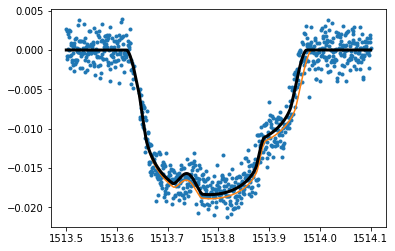

In [8]:
a1 = 124.7 
t1 = 16.57
e1 = 0.00001
p1 = 130.194
w1 = 90.0 * np.pi / 180
b1 = 0.0
i1 = np.arccos(b1 / a1)
a1 = a1 * ac.R_sun.value / ac.au.value

a2 = 61.5 
t2 = 12.41
e2 = 0.00001
p2 = 45.154
w2 = 0.1 * np.pi / 180
om2 = 150 * np.pi / 180
b2 = 0.1
i2 = np.arccos(b2 / a2)
a2 = a2 * ac.R_sun.value / ac.au.value

u1 = 0.5
u2 = 0.3
r1 = 0.1
r2 = 0.07

o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)
plt.plot(t, y - 1, '.')
plt.plot(t, sys.lightcurve(t, u1, u2, r1, r2))

def fun_jac(args):
    sigma, a1, t1, e1, p1, w1, a2, t2, e2, p2, om2, w2, r1, r2, u1, u2 = args
    o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
    o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
    sys = gf.ConfocalSystem(o1, o2)
    ll, dll = sys.loglike(y - 1, t, u1, u2, r1, r2, sigma, grad=True, sign=-1)
    dll = np.delete(dll, [6, 13])
    return ll, dll

x0 = [0.0016, a1, t1, e1, p1, w1, a2, t2, e2, p2, om2, w2, r1, r2, u1, u2]

%time res = minimize(fun_jac, x0, jac=True, method='TNC')
print(fun_jac(res.x)[0])

sigma, a1, t1, e1, p1, w1, a2, t2, e2, p2, om2, w2, r1, r2, u1, u2 = res.x
o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)
lc = sys.lightcurve(t, u1, u2, r1, r2, grad=False)

plt.plot(t, lc, color='k', linewidth=3)

[2.09178403e-03 1.65809420e+01 1.30197228e+02 1.23686139e+01
 4.51536353e+01 2.62383366e+00 1.62665725e-01 1.34578733e-01]


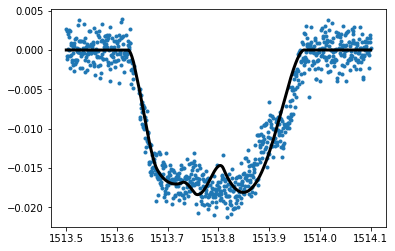

In [52]:
b1 = 0.9
b2 = 0.8
i1 = np.arccos((b1 / a1) * ac.R_sun.value / ac.au.value)
i2 = np.arccos((b2 / a2) * ac.R_sun.value / ac.au.value)

bounds = [(0.001, 0.002), (None, None), (0, 1), (0, 1)]

def get_lc(args):
            sigma, t1, p1, t2, p2, om2, r1, r2 = args
            o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
            o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
            sys = gf.ConfocalSystem(o1, o2)
            lc = sys.lightcurve(t, u1, u2, r1, r2)
            return lc

def fun_jac(args):
    sigma, t1, p1, t2, p2, om2, r1, r2 = args
    o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
    o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
    sys = gf.ConfocalSystem(o1, o2)
    ll, dll = sys.loglike(y - 1, t, u1, u2, r1, r2, sigma, grad=True, sign=-1)
    dll = dll[[0, 2, 4, 8, 10, 11, 14, 15]]
    return ll, dll
        
x0 = res.x[[0, 2, 4, 7, 9, 10, 12, 13]]
soln = minimize(fun_jac, x0, jac=True, method='TNC')

print(soln.x)
plt.plot(t, y-1, '.')
plt.plot(t, get_lc(soln.x), color='k', linewidth=3)

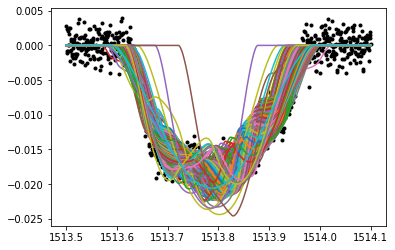

In [53]:
n = 20
b = np.linspace(0, 1, n)
ll = np.zeros((n, n))
plt.plot(t, y-1, 'k.')

bounds = [(0.001, 0.002), (None, None), (None, None), (None, None), (None, None), (None, None), (0, 1), (0, 1)]

for i in range(n):
    for j in range(n):
        i1 = np.arccos((b[i] / a1) * ac.R_sun.value / ac.au.value)
        i2 = np.arccos((b[j] / a2) * ac.R_sun.value / ac.au.value)
        
        def fun_jac(args):
            sigma, t1, p1, t2, p2, om2, r1, r2 = args
            o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
            o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
            sys = gf.ConfocalSystem(o1, o2)
            ll, dll = sys.loglike(y - 1, t, u1, u2, r1, r2, sigma, grad=True, sign=-1)
            dll = dll[[0, 2, 4, 8, 10, 11, 14, 15]]
            return ll, dll
        
        def get_lc(args):
            sigma, t1, p1, t2, p2, om2, r1, r2 = args
            o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
            o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
            sys = gf.ConfocalSystem(o1, o2)
            lc = sys.lightcurve(t, u1, u2, r1, r2)
            return lc
        
        def fun_no_overlap(args):
            sigma, t1, p1, t2, p2, om2, r1, r2 = args
            o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
            o2 = gf.ConfocalOrbit(a2, t2, e2, p2, 0.0, w2, i2)
            sys = gf.ConfocalSystem(o1, o2)
            ll = sys.loglike(y - 1, t, u1, u2, r1, r2, sigma, grad=False, sign=-1)
            return ll
        
        x0 = res.x[[0, 2, 4, 7, 9, 10, 12, 13]]
        soln = minimize(fun_jac, x0, jac=True, method='TNC', bounds=bounds)
        plt.plot(t, get_lc(soln.x))
        print('            ', end='\r')
        print(i, j, end='\r')
        ll[i, j] = fun_jac(soln.x)[0]

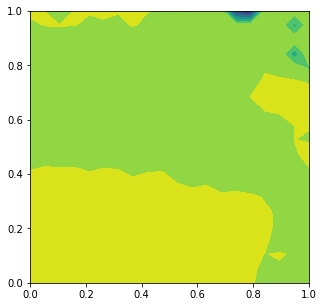

In [54]:
plt.figure(figsize=(5, 5))
plt.contourf(b, b, -ll)

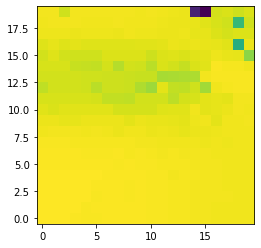

In [55]:
plt.imshow(-ll, origin='lower')

In [ ]:
ll\

In [ ]:
sigma, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r1, r2, u1, u2

In [ ]:
0.001, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r2, r1, u1, u2

In [ ]:
sigma, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2, r2, r1, u1, u2 = res.x
o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)
plt.plot(t, sys.lightcurve(t, u1, u2, r1, r2))

In [ ]:
np.hstack([[0], np.sum(np.array(list(lc[1].values())), axis=1)])

In [ ]:
list(lc[1].keys())

In [ ]:
sys.loglike(y, t, u1, u2, r1, r2, 0.001, grad=True)[1][14]